# 条件概率

事件在绝大多是情况下都不是孤立的，某一个事件的发生可能会对另一个事件发生的概率产生影响。在已知其他事件发生的前提下，我们想知道某个事件发生的概率有多大，这就是所谓的条件概率。

在已知某个事件的前提下，我们考察的焦点会集中在样本空间的一个子集上；这类概率被称为条件概率，记作$P(A|B)$或$Pr(A|B)$，读作“已知B时A的概率”。

在生活中，条件概率随处可见：
- 对一个65岁且不抽烟的人来说，他得肺癌的概率是多少？
- 在NBA总决赛勇士队总比分3:2领先凯尔特人队时，勇士队赢下总决赛的概率是多少？

## 通过期望计数法来猜测条件概率的公式

假设有一天你出去钓鱼，并制定了一个计划：一旦钓到鱼或者等待了4个小时，就停止钓鱼。你钓到鲫鱼的概率是40%，钓到鲈鱼的概率是25%，钓不到鱼的概率是35%（三个概率的和是1，概率公理之一：整体样本集合中的某个基本事件发生的概率为1）。而且你一天内最最多钓到一条鱼，如果有一天你钓到了一条鱼，这条鱼恰好是鲫鱼的概率是多少？

我们可以先假设你钓了1000次鱼，有400次是鲫鱼，250次钓到了鲈鱼，有350次没有收获。我们可以直接将目标范围锁定在钓到鱼的650次（400+250）上，其中有400次钓到了鲫鱼，那么钓到这条鱼是鲫鱼的概率就是400/650，约等于61.5%。

我们将A表示钓到了一条鲫鱼，B表示钓到鱼，$P(A)$和$P(B)$分别来表示钓到鲫鱼和钓到鱼的概率。那么$P(A)=0.4$，$P(B)=0.4+0.25=0.65$。如果我们钓到了一条鲫鱼，说明我们钓到了鱼，也就是说当事件A发生时，事件B已经发生了，我们将这个概率定义为$P(A \cap B)=0.4$。$P(A \cap B)/P(B)=0.4/0.65$恰好等于我们之前的答案

我们可以将上面的例子记录和总结下来。条件概率：设B是满足$P(B)>0$的事件，那么已知B时A的条件概率就等于
$$
P(A|B)=P(A \cap B)/P(B)
$$

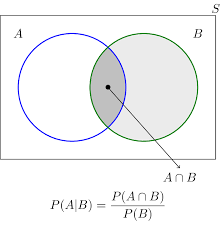

In [52]:
Image("./figure/figure21.png")

由上面的公式我们也可以推出另一个结论：$P(A \cap B)=P(A|B)\times P(B)$

这就是一般乘法规则

## 独立性

假设我们有下面一个袋子，袋子中一共有一个蓝色的球和三个白色的球。我们进行有放回的抽样，连续抽两次，在抽到的第一个球是白球的情况下，第二次抽到蓝球的概率是多少？

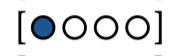

In [53]:
from IPython.display import Image
Image("./figure/figure22.png")

根据这个袋子的情况，我们可以知道在第一次抽取时，抽到白球的概率是3/4，没抽到白球（抽到蓝球）的概率是1/4。

当我们把第一次抽到的球放回到袋子后，再抽一次，抽到白球的概率是12/16（3/4），抽到蓝球的概率是4/16（1/4）。而两次抽球的颜色组合分别是白-蓝的共有3条路径，也就是概率为3/16.

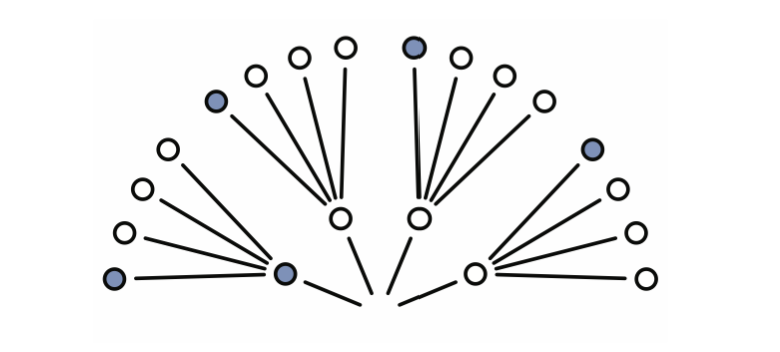

In [54]:
Image("./figure/figure23.png")

我们继续看在第一次抽到是白球的情况下，第二次抽到蓝球的概率。通过数路径可以发现概率应该是3/12，也就是1/4。将我们知道关于袋子内小球颜色组合情况后，套入到之前的条件概率公式中也可以得到一样的概率，将抽到白球的概率定义为$P(B)$，抽到蓝球的概率定义为$P(A)$:
$$
P(A|B)=P(A \cap B)/P(B)=\frac{3/16}{3/4}=1/4
$$

我们也可以通过python代码来模拟这一个过程：

In [55]:
###白——蓝
from random import randrange#返回指定递增基数集合中的一个随机数，基数默认值为1
from secrets import choice#返回一个列表，元组或字符串的随机项。


B, W = "blue", "white"
bags = (W, W, W, B)

n_trials = 1000000#试验次数
n_total = 0
n = 0

for i in range(n_trials):#开始遍历
    bag = list(bags)##随机抽取一个袋子
    ball = choice(bag)#从选中的袋子中随机抽一个球，pop函数为移除列表中的某一个值，randrange函数为生成0-3随机数(python从0索引，即第一个索引是0)
    if ball == W:#如果第一个是蓝球
        n_total+=1#总数加一个
        if choice(bag) == B:#如果第二个也是蓝球
            n +=1#抽取两个篮球数量加一
print(n/n_total)

0.24985640666166478


我们可以发现，不管是使用公式计算或者python模拟，结果都是1/4，但是这个1/4的概率似乎与从有三白一蓝四个球的袋子中直接抽取到一个蓝球的概率一致。也就是说我们抽取到一个白球后再将白球放回，再抽取一个球为蓝色的概率不受到抽取到白球的影响。用公式可以表达为：
$$
P(A|B)=P(A)
$$

这就是独立性，即如果事件B的发生不会改变事件A的发生的概率，那么A和B就是相互独立的。

# 一个复杂条件概率问题以及Python模拟例子

蓝球和白球：假如一共有5个袋子，每个袋子都装有4个白球或蓝球，如下：

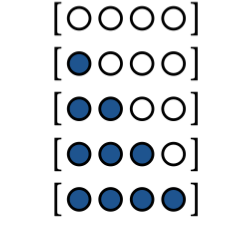

In [56]:
Image("./figure/figure20.png")

随机挑选一个袋子，不看袋子里面的情况，抽取一个球（不放回）。如果第一个球是蓝球，那么从同一个袋子中抽取第二个球也是蓝色的概率是多少？


首先，我们可以先看看可以连续抽两次都是蓝球的袋子。第一个袋子和第二个袋子，不可能出现抽到两个蓝球的事件，我们可以把范围缩小到后面三个箱子。

对第三个袋子进行全排列

In [57]:
import itertools
bag3 = ['蓝色', "蓝色", "白色", "白色"]#第三个袋子球的颜色
for ball in itertools.permutations(bag3):#连续返回由iterable元素生成的排列
    print(ball)#全排列抽取的可能

('蓝色', '蓝色', '白色', '白色')
('蓝色', '蓝色', '白色', '白色')
('蓝色', '白色', '蓝色', '白色')
('蓝色', '白色', '白色', '蓝色')
('蓝色', '白色', '蓝色', '白色')
('蓝色', '白色', '白色', '蓝色')
('蓝色', '蓝色', '白色', '白色')
('蓝色', '蓝色', '白色', '白色')
('蓝色', '白色', '蓝色', '白色')
('蓝色', '白色', '白色', '蓝色')
('蓝色', '白色', '蓝色', '白色')
('蓝色', '白色', '白色', '蓝色')
('白色', '蓝色', '蓝色', '白色')
('白色', '蓝色', '白色', '蓝色')
('白色', '蓝色', '蓝色', '白色')
('白色', '蓝色', '白色', '蓝色')
('白色', '白色', '蓝色', '蓝色')
('白色', '白色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '白色')
('白色', '蓝色', '白色', '蓝色')
('白色', '蓝色', '蓝色', '白色')
('白色', '蓝色', '白色', '蓝色')
('白色', '白色', '蓝色', '蓝色')
('白色', '白色', '蓝色', '蓝色')


根据我们的需求，我们想得到的是前两次抽到都是蓝球。所以共有4种情况（以“蓝色”，“蓝色”开头），也就是第三个袋子前两次抽到蓝色球的概率是$4/24=1/6$

同样，我们可以算出从第四个、第五个袋子中连续抽取前两次都是蓝色球的概率

In [58]:
import itertools
bag4 = ['蓝色', "蓝色", "蓝色", "白色"]#第四个袋子球的颜色
for ball in itertools.permutations(bag4):#连续返回由iterable元素生成的排列
    print(ball)#全排列抽取的可能


('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '蓝色', '蓝色', '白色')
('蓝色', '蓝色', '白色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('蓝色', '白色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')
('白色', '蓝色', '蓝色', '蓝色')


在第四个袋子中，前两次连续抽到蓝球的概率为$12/24=1/2$

In [59]:
import itertools
bag5 = ['蓝色', "蓝色", "蓝色", "蓝色"]#第五个袋子球的颜色
for ball in itertools.permutations(bag5):#连续返回由iterable元素生成的排列
    print(ball)#全排列抽取的可能

###########共有24种抽取组合可以连续抽出蓝球

('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')
('蓝色', '蓝色', '蓝色', '蓝色')


在第5个袋子中前两次都抽取出蓝色球的概率为1

根据五个袋子的情况，从第一个和第二个袋子中抽到两个蓝球是不可能的，只有从第三、四、五个袋子中才能连续抽取到两个蓝球。五个袋子中，选择后三个的概率各是1/5。我们将之前计算的后三个袋子中前两次连续抽到蓝球的概率和选择后三个袋子的概率结合起来，就是连续抽出两个篮球发生的概率:


$$P(A \cap B)=1/6 \times 1/5 + 1/2 \times 1/5 + 1 \times 1/5=1/3$$

再回过头想想我们的问题：“如果第一个球是蓝球（抽到蓝球的事件已经发生了），再从同一个袋子中抽取第二个球也是蓝色的概率是多少？”

到现在，我们计算出了抽取两个球都是蓝色的概率，但是我们想知道的是在第一个球是蓝色的情况下（抽取到第一个是蓝色的事件已经发生了），抽取第二个球也是蓝色的概率。

换一个思路，假设我们想知道在我们贝叶斯推断的课程中，男生的占比。我们就会把班级总人数作为分母，男生人数作为分子进行计算。

再回到我们的摸球例子中，我们想知道在抽到一个蓝色球后，再抽到一个蓝色球的概率是多少。我们可以把抽到一个蓝色球的概率作为分母，第二次也抽出蓝色球的概率作为分子，我们将第一个球是蓝球的情况下（抽取到第一个是蓝色的事件已经发生了），抽取第二个球也是蓝色的概率定义为$P(A|B)$，第一次抽到篮球的概率定义为$P(B)$，结合之前的出现前两次抽到两个篮球的概率，可以得到以下公式：

$$
P(B)=1/5 \times 0 + 1/5 \times 1/4 + 1/5 \times 2/4 + 1/5 \times 3/4 + 1/5 \times 1 = 1/2 \\
P(A|B)=P(A \cap B)/P(B)=2/3
$$

## Python代码模拟

In [60]:
from random import randrange#返回指定递增基数集合中的一个随机数，基数默认值为1
from secrets import choice#返回一个列表，元组或字符串的随机项。


B, W = "blue", "white"
bags = ((W, W, W, W), (W, W, W, B),(W, W, B, B), (W, B, B, B), (B, B, B, B))

n_trials = 1000000#试验次数
n_total = 0
n = 0

for i in range(n_trials):#开始遍历
    bag = list(choice(bags))##随机抽取一个袋子
    ball = bag.pop(randrange(4))#从选中的袋子中随机抽一个球，pop函数为移除列表中的某一个值，randrange函数为生成0-3随机数(python从0索引，即第一个索引是0)
    if ball == B:#如果第一个是蓝球
        n_total+=1#总数加一个
        if choice(bag) == B:#如果第二个也是蓝球
            n +=1#抽取两个篮球数量加一
print(n/n_total)

0.6674302665403329


# 贝叶斯定理

在我国，每100人中至少有3人患抑郁症。假设小明情绪低落，去医院检查是否患抑郁症，医生告诉小明，抑郁症检测出现假阳性的概率是1%，也就是说每100个健康人中会有一个人的测试为阳性。医生还告诉小明，这个测试假阴性率为0.1%，即每1000抑郁症患者中，只有一人会被检测为阴性。假设小明检测为阳性，那么得抑郁症的概率是多少？

我们可以假设现在有100000人，这样设定是来自问题中100人中有3人患有抑郁症，我们可以通过树状图看到更形象的展示：

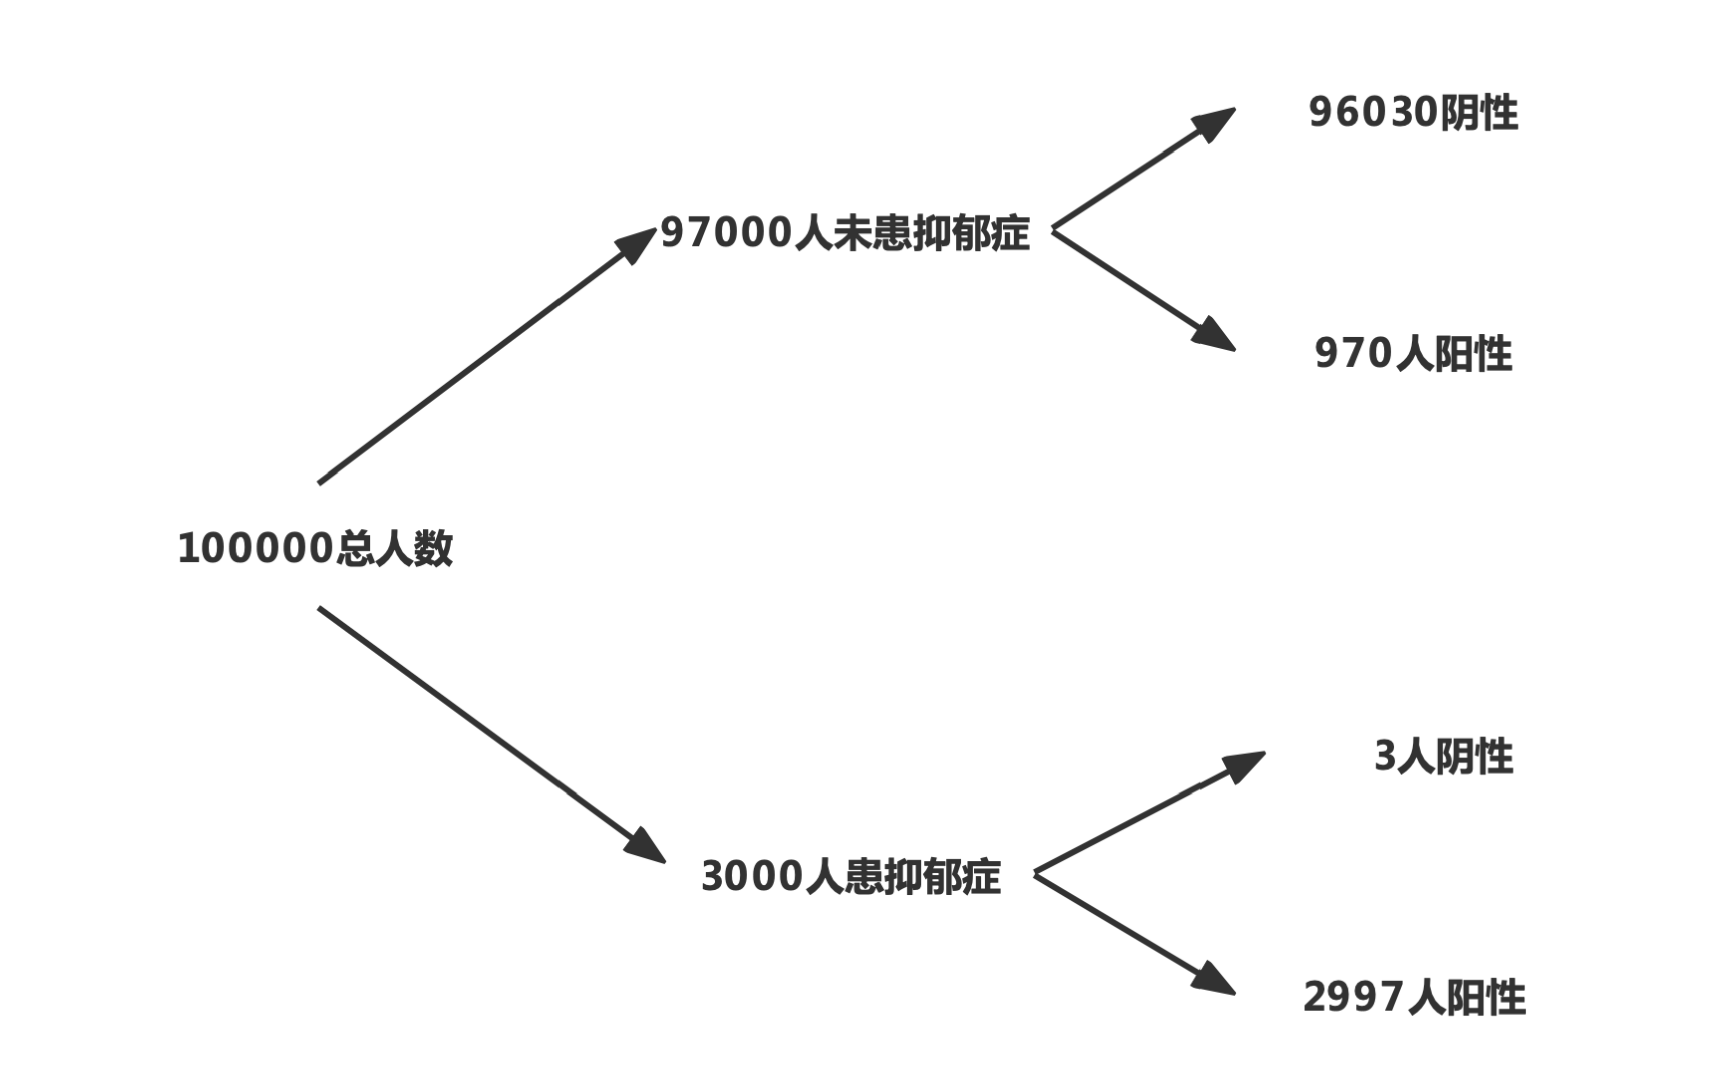

In [61]:
Image("./figure/figure24.png")

所以当小明检测为阳性，又患抑郁症的概率为
$$
2997/(970+2997)\approx0.755
$$

如果我们用条件概率的知识，我们已知$P(阳性|健康)$和$P(阴性|得病)$，希望求出$P(得病|阳性)$，我们可以根据上面的例子得到：

$$
P(得病|阳性)=P(得病)\times P(阳性|得病)/P(阳性)$$

这就是我们说的贝叶斯定理，或者贝叶斯公式